# Ridge Regression and the Lasso  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
hitters = pd.read_csv('../../data/Hitters.csv', index_col=0, na_values='NA').dropna()
hitters = pd.get_dummies(hitters, drop_first=True)

features = hitters.columns.drop('Salary')

X = hitters[features].values
y = hitters['Salary'].values

#need to scale the features before using ridge or lasso
sc = StandardScaler()
X = sc.fit_transform(X)

#let's go ahead and get the linear regression coefficients
lr = LinearRegression()
lr.fit(X, y)
lr_coefs = lr.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


# Ridge Regression

In [3]:
alpha = np.logspace(10, -2, num=100)

ridge = Ridge()
ridge_coefs = []

for a in alpha:
    ridge.set_params(alpha=a)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

ridge_coefs = np.array(ridge_coefs)
print(ridge_coefs.shape)

(100, 19)


In [4]:
print('Alpha: {}'.format(alpha[49]))
print('Ridge Coefficients: {}'.format(ridge_coefs[49]))
print('L2 Norm: {}'.format(np.sqrt((ridge_coefs[:50,:]**2).sum())))

Alpha: 11497.569953977356
Ridge Coefficients: [ 3.49457396  3.95273518  2.98390005  3.75468987  3.9810762   3.99185664
  3.46120924  4.61714183  4.84825026  4.62598752  4.9699381   5.0089575
  4.27552715  2.83798607  0.23644179 -0.06961642 -0.03422276 -1.87780156
  0.04848929]
L2 Norm: 24.606044842538825


In [5]:
print('Alpha: {}'.format(alpha[59]))
print('Ridge Coefficients: {}'.format(ridge_coefs[59]))
print('L2 Norm: {}'.format(np.sqrt((ridge_coefs[:60,:]**2).sum())))

Alpha: 705.4802310718645
Ridge Coefficients: [ 16.43690865  24.14788951  11.54151968  20.79688084  19.9972427
  23.88545274  13.47874339  22.48210332  25.85029297  23.99094997
  26.45446691  26.81973239  18.86200846  24.64957369   1.67756867
  -2.60290933   4.29466943 -19.59863203   3.19071614]
L2 Norm: 172.64599682347986


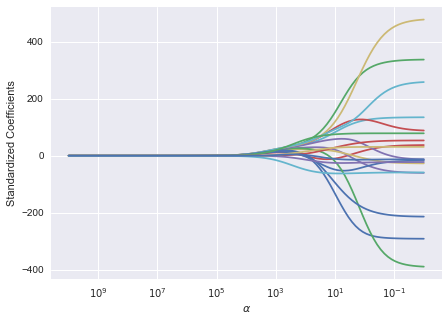

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.semilogx(alpha, ridge_coefs)
ax.invert_xaxis()
ax.set(xlabel=r'$\alpha$', ylabel='Standardized Coefficients');

In [7]:
ridge = Ridge(alpha=50)
ridge.fit(X, y)
ridge.coef_

array([-23.38692143,  67.26353481,  -7.54561073,  29.87611594,
        21.76662157,  49.62294402, -16.94961798,  20.75213404,
        56.33412498,  45.78076075,  57.37543924,  59.15884777,
       -16.43540657,  65.22827834,  12.41897939, -18.40543187,
        19.39179721, -55.64249114,  -0.99103297])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
ridge = Ridge(alpha=4)
ridge.fit(X_train, y_train)
mean_squared_error(ridge.predict(X_test), y_test)

127015.05249180362

In [9]:
((y_train.mean() - y_test)**2).mean()

231853.41506333509

In [10]:
ridge = Ridge(alpha=10**10)
ridge.fit(X_train, y_train)
mean_squared_error(ridge.predict(X_test), y_test)

231853.39962619243

In [11]:
ridge = Ridge(alpha=0)
ridge.fit(X_train, y_train)
mean_squared_error(ridge.predict(X_test), y_test)

134597.49902509025

In [12]:
ridgecv = RidgeCV(alphas=alpha, scoring='neg_mean_squared_error', cv=10)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([  1.00000e+10,   7.56463e+09, ...,   1.32194e-02,   1.00000e-02]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [13]:
ridgecv.alpha_

132.19411484660287

In [14]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
mean_squared_error(ridge.predict(X_test), y_test)

129165.94154328204

In [15]:
ridge.fit(X, y)
ridge.coef_

array([  5.92869218,  44.29809736,   1.93502691,  28.22053082,
        22.6214209 ,  38.46320287,   1.83086891,  25.63382893,
        41.06629151,  36.29591677,  41.6613909 ,  43.44297997,
         8.95289801,  52.44305002,   5.80445746, -11.47962456,
        13.16636155, -44.88246996,   3.80947944])

# The Lasso

In [16]:
lasso = Lasso(max_iter=10000)

lasso_coefs = []

for a in alpha:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)
    
lasso_coefs = np.array(lasso_coefs)
print(lasso_coefs.shape)

(100, 19)


[<matplotlib.text.Text at 0x21e2b470>, <matplotlib.text.Text at 0x21df4860>]

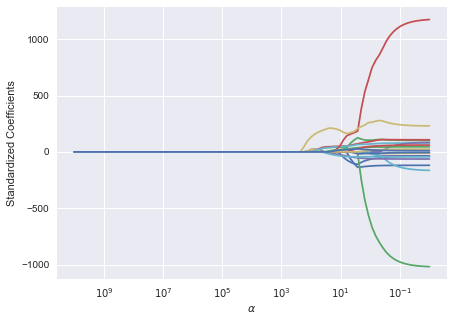

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
ax.semilogx(alpha, lasso_coefs)
ax.invert_xaxis()
ax.set(xlabel=r'$\alpha$', ylabel='Standardized Coefficients')

In [18]:
lassocv = LassoCV(alphas=alpha, cv=10, max_iter=10000)
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([  1.00000e+10,   7.56463e+09, ...,   1.32194e-02,   1.00000e-02]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=10000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [19]:
lassocv.alpha_

32.745491628777316

In [20]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(lasso.predict(X_test), y_test)

137110.82403640184

In [21]:
pd.Series(lasso.coef_, index=hitters.columns.drop('Salary'))

AtBat            0.000000
Hits            36.794153
HmRun           44.530841
Runs             0.000000
RBI              0.000000
Walks           36.835231
Years            0.000000
CAtBat           0.000000
CHits            0.000000
CHmRun           0.000000
CRuns          200.339202
CRBI             0.000000
CWalks           0.000000
PutOuts          1.782653
Assists         -0.000000
Errors          -0.000000
League_N         0.000000
Division_W      -8.834275
NewLeague_N      0.000000
dtype: float64